In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Ler o arquivo csv e exibir as 5 primeiros linhas
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Verificar valores nulos/ausentes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Estatísticas descritiva
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Selecionar dados numéricos 
numerical_data =  data.select_dtypes(include=['float64', 'int64'])

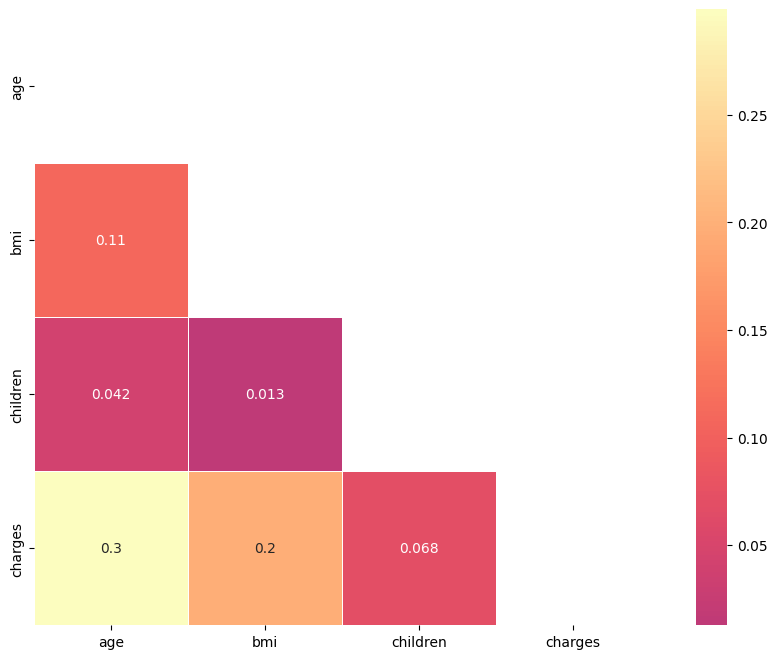

In [7]:
import seaborn as sns
import numpy as np

# Calcular a matriz de correlação
corrmat = numerical_data.corr()

# Criar uma máscara para a metade superior
mask = np.triu(np.ones_like(corrmat, dtype=bool))

# Plotar o heatmap
plt.figure(figsize=(12, 8))
# Desenhar o heatmap com a máscara
sns.heatmap(corrmat, mask=mask, annot=True, center=0, cmap='magma', square=True, linewidths=.5)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = data.drop('charges', axis=1)
y = data['charges']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((1070, 6), (268, 6))

In [11]:
numerical_features = X_train.select_dtypes(exclude=['object']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numerical_features, categorical_features

(['age', 'bmi', 'children'], ['sex', 'smoker', 'region'])

In [12]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [13]:
# Criar um ColumnTransformer para aplicar OHE nas variáveis categóricas e Scaler nas variáveis numéricas
preprocessor = ColumnTransformer ([
    ('cat', OneHotEncoder(drop='first'), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

In [14]:
from sklearn.pipeline import Pipeline
import lightgbm as lgb

In [15]:
from sklearn.linear_model import LinearRegression

In [17]:
# Construir e treinar o pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('regressor', LinearRegression())])

In [18]:
# Avaliação do modelo
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error
)
# Predição com as features de test
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Exibir os resultados
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}")

MAE: 4181.19
MSE: 33596915.85
RMSE: 5796.28
MAPE: 0.47


In [20]:
X_test[0:1]

,age,sex,bmi,children,smoker,region
764,45,female,25.175,2,no,northeast


In [24]:
data.loc[764].charges

9095.06825

In [25]:
entrada = X_test[0:1]
pipeline.predict(entrada)[0]


8969.550274436126

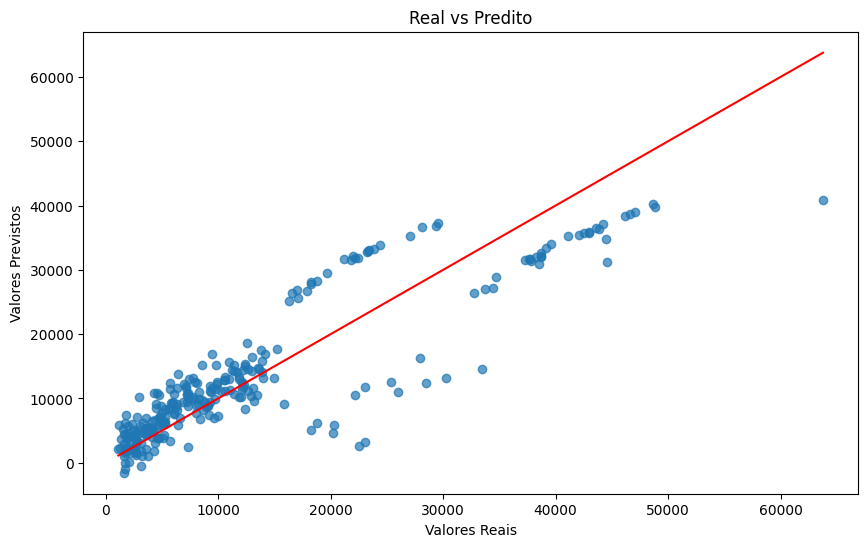

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Real vs Predito')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1c571e6c800>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5747d8440>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5742294c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5747d8860>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5747d8b90>],
 'means': []}

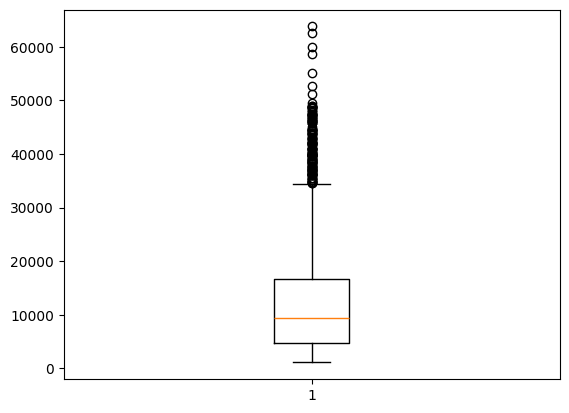

In [17]:
plt.boxplot(data['charges'])